# **Projeto - Regressão Keras**

A ideia deste projeto é aplicar alguns conhecimentos de *deep learning* para a previsão de custos de moradias. 

## **Os dados**

Usarei dados abertos da plataforma Kaggle. O data set pode ser obtido no seguinte 
link : 

https://www.kaggle.com/harlfoxem/housesalesprediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\apfurlan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\apfurlan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\apfurlan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\apfurlan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\apfurlan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

## **1. Análise exploratória de dados**

In [5]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

O dataframe possui as seguintes colunas : 

**Feature Columns**
* id - Indicador de casa imóvel. 
* date - Data da venda da casa. 
* price - Preço da venda da casa. 
* bedrooms  - Número de quartos. 
* bathrooms - Numero de banheiros. 0.5 = lavabo. 
* sqft_living - Metragem quadrada do espaço útil do apartamento. 
* sqft_lot - Metragem quadrada do terreno.  
* floors - Número de andares.  
* waterfront - Vista para o mar. 
* view - Vista do apartamento. De 0 a 4 
* condition - Condição do apartamento. De 1 a 5. 
* grade - Índice de 1 a 13 que qualifica a constriução. 1-3 fica abaixo da construção e design de edifícios, 7 tem um nível médio e 11-13 têm design de construção de alto nível de qualidade. 
* sqft_above - Metragem quadrada do espaço interno da habitação que está acima do nível do solo. 
* sqft_basement - Metragem quadrada do espaço interno da habitação que está abaixo do nível do solo.  
* yr_built - Quantidade de anos desde sua construção. 
* yr_renovated - Quantidade de anos desde a última reforma. 
* zipcode - Código postal da área. 
* lat - Latitude. 
* long - Longitude. 
* sqft_living15 - Metragem quadrada do espaço interno de habitação para os 15 vizinhos mais próximos. 
* sqft_lot15 - Metragem quadrada de lotes de terra dos 15 vizinhos mais próximos

Nesta primeira etapa vamos ver temos dados ausentes no data set. Isso pode ser feito de diversas formas uma dela é através da função <tt>isnull</tt>

In [8]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Perfeito ! Não há nenhum dado ausente no data set. Obeserve que a função <tt>.sum()</tt>
soma todos os elementos de uma coluna. Neste caso, <tt>isnull</tt> retorna <tt>False<tt> que é numéricamente igual a zero e portanto todas as colunas tem soma nula.

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Vamos inicialmente identificar qual o intervalo de preços com mais ocorrência. Isso nos permitirá identificar possíveis *outliers* e então removê-los. Isso pode ser feito plotando a distibuição de preços. 

<AxesSubplot:xlabel='price'>

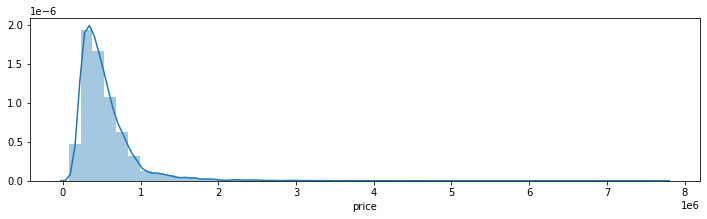

In [11]:
fig = plt.figure(figsize=(12,3))
sns.distplot(df['price'])

De fato ! A esmagadora maioria dos imóveis contidas no data set tem preços entre 0 e 1.5$\times$10$^6$ dólares. Neste ponto pode ser interessante remover imóveis com valores muito altos. Ao fazer isso teremos um modelo mais realista para prever o preço de residências ate $\approx$ 2$\times 10^6$ dólares. De fato pode não ser muito útil treinarmos nosso modelo com estes dados de valores extremos. 

**OBS :** Sei que removendo *outliers* estou prejudicando 'clientes' que queiram comprar imóveis de valores superiores aos $3$ milhões de dólares. Por agora meu intúito é ter um modelo que contemple a maior parte dos dados disponíveis. 

Vamos prosseguir para os dados categóricos agora. 

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

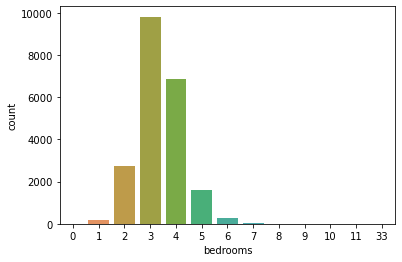

In [12]:
sns.countplot(df['bedrooms'])

Os dados mostram que parece haver uma distribuição normal para o número quartos. A maior parte dos imóveis tem  entre 2 e 5 quartos. Também parece haver algum tipo imóvel que tem impressionantes 33 quartos. Imóveis que tem entre 8 e 33 ocorrem em número bem pequeno. 

In [13]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Tentando decidir qual a variável explorar inicialmente, tomei a correleção das *features* com a coluna <tt>price</tt>. Vemos que <tt>sqft_living</tt>,<tt>grade</tt> e <tt>sqft_above</tt> são três maiores correlações.     

<AxesSubplot:xlabel='price', ylabel='grade'>

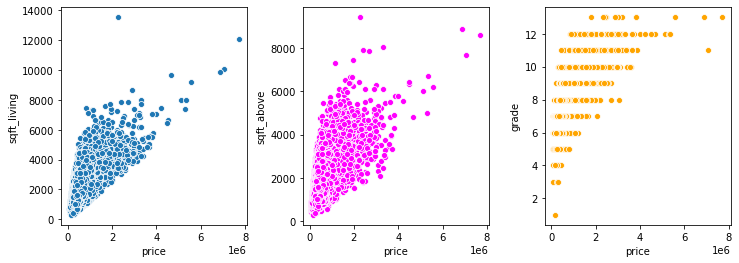

In [14]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
plt.subplots_adjust(wspace=.3)
sns.scatterplot(x='price',y='sqft_living',data=df,ax=axes[0])
sns.scatterplot(x='price',y='sqft_above',color='magenta',data=df,ax=axes[1])
sns.scatterplot(x='price',y='grade',color='orange',data=df,ax=axes[2])

Plotei as *features* com as maiores correlações. A interpretação de <tt>sqft_living/above</tt> são imediatas. Imóveis com maior área e mais espaço útil tendem a custar mais. O plot <tt>grade</tt> *versus* <tt>price</tt>
nos mostram o intervalo de preços que ocorrem em cada nível de grade. Por exemplo, valores entre 1 e 4 representam imóveis de muito baixo padrão e por isso o valor máximo destes imóveis mal chegam $1 \times 10^6$
dólares. Entre 7 e 10 temos um intervalo de preços bastante semelhante em todos os grade's pois são imóveis com padrão semelhante. Por fim imóveis de 11 a 13 são aquele de luxo e por isso chegam a atingir $8\times 10^6$ dólares. 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

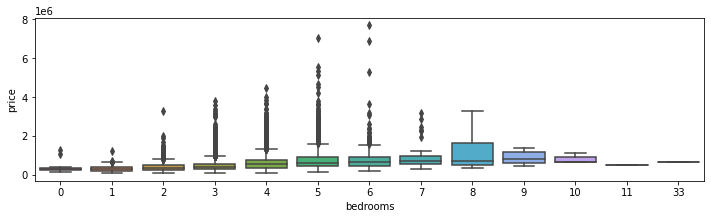

In [15]:
plt.figure(figsize=(12,3))
sns.boxplot(x='bedrooms',y='price',data=df)

acima temos a distribuição de preços por número de quartos. Vimos anteriormente que maior parte dos imóveis tem entre 3 e 6 quatos. Aqui vemos que os imóveis de 3 quartos além de serem os mais comuns, apresentam uma dispersão de valores pequena se comparada com imóveis com mais quartos. No caso dos imóvies com 6 quartos temos outliers assumindo os valores máximos de imóveis.

Queremos agora iniciar um investigação da relação de preço com a localização dos imóveis. Vimos que o data set nos fornece latitude e longitude dos imóveis. Vamos inicialmente entender em que lugar do globo estamos. Para isso vamos utilizar a biblioteca <tt>foluim</tt> do python. Para maiores informações acessar : 
https://python-visualization.github.io/folium/

In [16]:
! pip install folium

In [17]:
import folium

In [18]:
## aqui estou selecionando somente 100 imoveis para não deixar a imagem muito
## poluída.
Npoints = 100
map = folium.Map(location=[df['lat'].mean(),df['long'].mean()], 
                 zoom_start=11)

for i in range(0,df.shape[0],int(df.shape[0]/50)) : 
  folium.Marker(location=[df['lat'].iloc[i],
                          df['long'].iloc[i]],
                popup='index='+str(i),
                icon=folium.Icon(color='red', icon='info-sign')).add_to(map)

map

Estamos com dados referentes a cidade de Seatle. Vemos que existe uma região litorânea bastante grande e isso deve influenciar o valor dos imóveis. Vamos então investigar a distribuição de preços em função de latitude e longitude. 

<AxesSubplot:xlabel='price', ylabel='lat'>

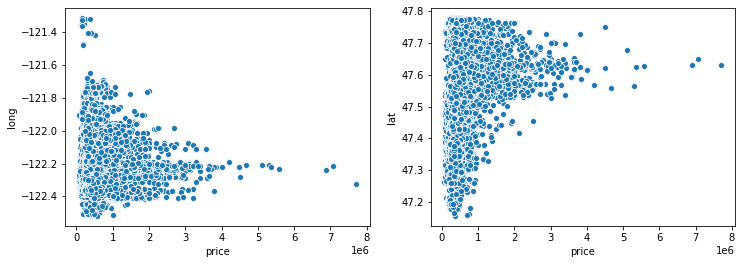

In [19]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(x='price',y='long',data=df,ax=axes[0])
sns.scatterplot(x='price',y='lat',data=df,ax=axes[1])

Para haver uma longitude privilegiada. Próximo do  valor -122.2 existe não só uma grande ocorrência de imóvies como também um grande intervalo de valores. A região -122.2 pode apresentar imóveis bem caros. Deve haver algo nessa região que responda o alto valor dos imóveis. Já em relação a latitude vemos um comportamento bastante semelhante. Também existe um região bastante nítida onde se concentram os imóveis mais caros. Sendo assim deve haver uma combinação de latitude e longitude que corresponda a uma região 'nobre' de Seatle. 

<AxesSubplot:xlabel='long', ylabel='lat'>

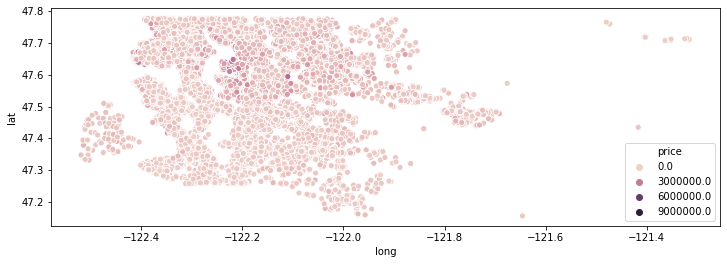

In [20]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

Note que os pontos de no entorno de x=-122.2 e y=47.6 são imóveis com os maiores preços catalogados.  Para melhorar ainda mais nossa análise vamos remover aqueles imóveis que tem valores extremamente altos. Vamos fazer isso pois, na fomar como os dados se apresentam, o gradiente de cores não nos fornece muita informação já que alguns poucos imóvies puxam os valores para muito alto, deixando varios imóvies em um mesmo gradiente de cor.  

In [21]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Vemos que os 20 dos imóveis mais caros, temos aqueles próximos a 8 milhões e então o valor rápidamente cai para algo em torno de 3 milhões. De fato isso foi verificado no nosso primeiro plot. Vimos que maiore parte dos 
imóveis se concentravam na região de 0 até 2milhões. Sendo assim quero remover os imóveis estão muito fora dessa região.

In [22]:
df.shape[0]

21613

In [23]:
df[df['price'] <= 2000000.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
print(df.shape[0] - len(df[df['price'] <= 2000000.0]),'~','1% de len(df)')

198 ~ 1% de len(df)


In [25]:
onePercExcluded = df.sort_values('price',ascending=False).iloc[200:]

Estou excluindo as 200 primeiras linhas do df original. Vimos que isso corresponde a remover 1% do data set. Desejamos que isso remova os imóveis com preços extremos e consequentemente gere um gradiente de cor mais fiel a média dos preços praticados.

<AxesSubplot:xlabel='long', ylabel='lat'>

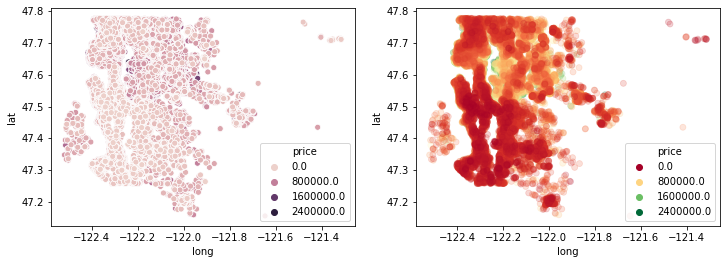

In [26]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(x='long',y='lat',data=onePercExcluded,hue='price',
                ax=axes[0])

sns.scatterplot(x='long',y='lat',data=onePercExcluded,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price',ax=axes[1])

(47.0, 47.9)

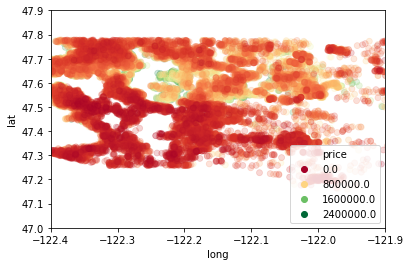

In [27]:
sns.scatterplot(x='long',y='lat',data=onePercExcluded,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')
plt.xlim(-122.4,-121.9)
plt.ylim(47.0,47.9)

Este gráfico nos permite responder a pergunta feita em relação à combinação de latitude e longitude que correspondam aos imóveis mais caros. De fato a combinação que corresponde à região de North Beach próximo ao Carkeek park são as mais caras dentre o dados. Outro fato é que essa região está a beira-mar e em geral essas 
regiões são mais caras. Segue abaixo uma foto da região do Carkeek Park.

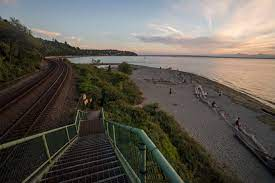

In [28]:
from IPython import display
display.Image("carkeek.jpg",width = 500, height = 200)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

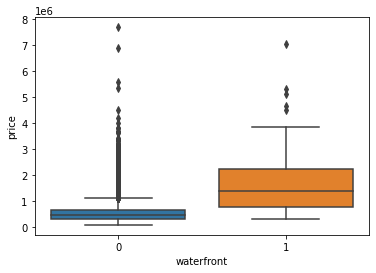

In [29]:
sns.boxplot(x='waterfront',y='price',data=df)

De fato, de você estiver à procura de uma residência beira-mar é mais porvável que pagará mais caro. Veja que o primeiro quartil já inicia de valores bem maiores que o terceio quartil para residência que não estão à beira-mar. Ademais, a dispersão de valores é bastante grande, podendo chegar a imóveis de 2.5 milhoes.

## **2. Processamento de dados e Criação do Modelo.**

In [30]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Vou remover a coluna <tt>id</tt>. Ela é irrelevante para esta análise. 

In [31]:
df = df.drop('id',axis=1)

In [32]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


ok ! Vamos agora olhar para a coluna  **date**. Apesar de conserguirmos identificar a data na coluna, notamos que não há um formato padrão para as entradas. Precisamos trabalhar nestes dados em duas etapas

**Passo 1 :** Remover os caracteres T000000 \
**Passo 2 :** Convertê-lo em um objeto datetime

In [33]:
df['date'] = df['date'].str.replace('T000000','')

In [34]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [35]:
df['date'] = pd.to_datetime(df['date'])

In [36]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

Ok ! Agora temos um objeto do tipo datetime64. 

In [37]:
df['year']  = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

In [38]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


Agora podemos avaliar a variação de preços no tempo. 

<AxesSubplot:xlabel='month', ylabel='price'>

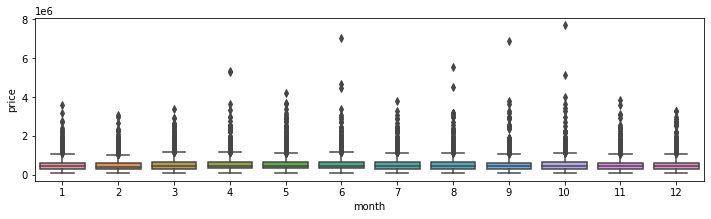

In [39]:
plt.figure(figsize=(12,3))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='year'>

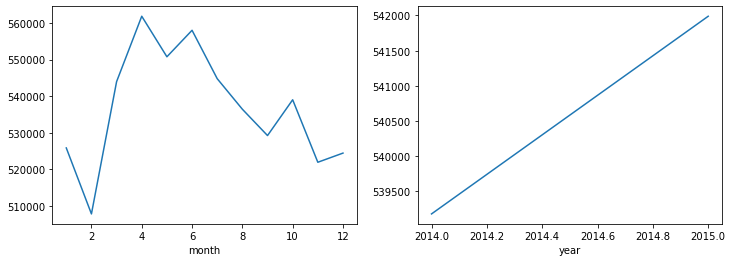

In [40]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
df.groupby('month').mean()['price'].plot(ax=axes[0])
df.groupby('year').mean()['price'].plot(ax=axes[1])

In [41]:
df = df.drop('date',axis=1)

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [43]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [44]:
type(df['zipcode'][0])

numpy.int64

Vemos que a variável zipcode aprece como um número inteiro. Isso não faz sentido para zipcode uma vez que esse tipo de variável pode ser interpretada como categórica.

In [45]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Temos 70 códigos postais diferentes. 

**OBS :** Seria interessante neste ponto fazer um função que, dado um código postal, encontra o bairro e/ou região da cidade. Isso nos permitiria classificar os imóveis apenas pelos seus códigos postais. No entanto, para os propósitos do momento, esse tipo de análise não será necessária.

In [46]:
df = df.drop('zipcode',axis=1)

In [47]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

dentre os valores fornecidos exsitem 20699 imóvies que não foram reformados e por esse motivo o ano de reforma consta como zero. Precisamos definir uma maneira de atribuir valores para esses campos. Diversas metodologias podem ser usadas aqui.

Vamos considerar que zero não é de fato um ano, e sim basicamente uma indicação de que o imóvel não foi reformada. Desse forma o que podemos fazer é simplismente criar uma função que retorna reformado ou não reformado se year é maior ou igual a zero respectivamente.  

Podemos ainda usar um fato a nosso favor. Imóveis que tem reforma mais recentes, possuem probabilidade maior de terem um valor mais alto (intuitivamente falando). Sendo assim, como zero reflete a não reforma do imóvel, podemos substituir zero pelo menor valor possível que é a data de construção do imóvel.

Deixar para lá.

In [48]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

Aqui um fato semelhante ocorre. Vemos muitas entradas com valor de área zero. Isso significa que esses imóveis não possuem porão. Outra coisa que notamos é que a medida que a área do porão aumenta o número de ocorrências diminui. Isso é bastante intuitivo. Deve ser mais raro encontrar casas com porões enormes do que casas com porões de um tamanho médio. 

## **3. Machine learning e pré-processamento**

Nesta etapa temos como objetivo realizar o pré-processamento dos dados e então criar um modelo de Machine Learning.

Um modelo de **machine learning** é a equação final gerada através de um algoritmo de ML, que será utilizada para definir valores de saída a partir de novos dados apresentados. Nosso conjunto de features será todo o data set a menos da coluna **price** que será nossa target.

In [49]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=101)

Vamos ajustar e transformar o conjunto de treinamento. Para isso podemos utilizar o <tt>MinMaxScaler</tt>

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
X_train =  scaler.fit_transform(X_train)

aqui posso ajustar o data set e transformá-lo em um só comando. Há a possibilidade de fazê-lo em etapas distintas. Posteriormente encaminhamos o recall do conjunto de testes.

In [55]:
X_test = scaler.transform(X_test)

In [60]:
import tensorflow.python as tf

In [61]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [62]:
X_train.shape

(15129, 19)

criando um modelo sequencial. Tipicamente o que fazer é tentar basear o número de unidades em nossas camadas a partir do tamanho dos dados reais. Temos 19 variáveis features (veja a saída de X_train.shape[1]). Parece razoável criar um 19 neurônios em nossa camada e a camada de ativação será uma unidade linear retificada. (relu = retified linear unity). A camada final terá apenas 1 neurônio.

In [64]:
model = Sequential() 
model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))

#última camada terá apenas 1 neurônio já que retorno no output desejado.
model.add(Dense(1))

# algoritmo de Adam para otimizar e usar mean square error como métrica
model.compile(optimizer = 'adam',loss = 'mse')

In [65]:
#passando os dados de treino.
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128, epochs=400)

#validation_Data adiciona dados de validação ao longo do 
#procedimento de ajuste

Epoch 1/400
119/119 [==============================] - 2s 8ms/step - loss: 431765203080.5333 - val_loss: 433006804992.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 418988628377.6000 - val_loss: 429494960128.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 410344696763.7333 - val_loss: 396825395200.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 353391661329.0667 - val_loss: 281320783872.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 235905285324.8000 - val_loss: 135653113856.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 118303143185.0667 - val_loss: 104697405440.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 98595968068.2667 - val_loss: 102748266496.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 99473580168.5333 - val_loss: 101195333632.0000
Epoch 9/400
119/11

vamos avaliar o procedimento de ajuste. Isso pode ser feito analisando
a história do processo e obtendo o loss ao longo do processo. Lembrando que loss é a perda no conjunto de teste. Com isso poderemos compara o loss no treinamento X o loss no teste.

In [68]:
losses = pd.DataFrame(model.history.history)
losses 

,loss,val_loss
0,4.236247e+11,4.330068e+11
1,4.226235e+11,4.294950e+11
2,4.086871e+11,3.968254e+11
3,3.392721e+11,2.813208e+11
4,1.961447e+11,1.356531e+11
...,...,...
395,2.841940e+10,2.835912e+10
396,2.839316e+10,2.834485e+10
397,2.838366e+10,2.836984e+10
398,2.835545e+10,2.831579e+10


<AxesSubplot:>

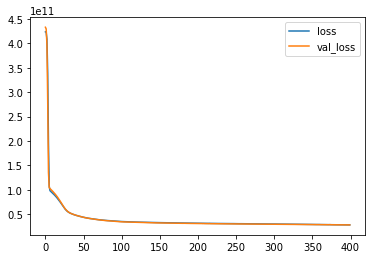

In [69]:
losses.plot()

Observamos que existe uma diminuição no *loss* tanto nos dados de trieno como nos dados de validação e essa diminuição se prolonga até o final do procedimento. O comportamento ideal. Vamos agora fazer um avaliação nos dados de teste. 

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [77]:
predictions = model.predict(X_test)

In [79]:
np.sqrt(mean_squared_error(y_test,predictions))

168396.83089618996

In [80]:
mean_absolute_error(y_test,predictions)

103737.10945572756

In [82]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Vemos que o preço médio das casas é de 540 mil dólares. O erro absoluto médio é de cerca de 160 mil dólares. O erro obtido é aproximadamente 20% do valor da medida, isso não é muito bom.

In [83]:
explained_variance_score(y_test,predictions)

0.7982245812769414

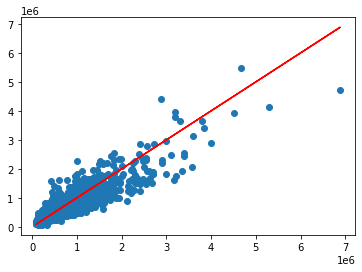

In [88]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

A linha vermelha representa uma previsão perfeita dos dados enquanto os pontos representam a correlação entre os dados de teste e as predições feitas pelo nosso modelo. Vamos agora tentar prever como podemos usar este nosso modelo para prever o preço de casas totalmente novas.

In [90]:
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

Ok ! vamos super que tenho o imóvel acima e que desejo vendê-lo em uma data futura. Sabemos todas as informações da casa e vamos chamá-las de single_house.

In [91]:
single_house = df.drop('price',axis=1).iloc[0]

In [94]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [95]:
model.predict(single_house)

array([[277740.66]], dtype=float32)

In [96]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


Ou seja, nossa previsão mostoru que a casa custaria 277740, porém nossos dados reais mostratam que a casa custou 221900 dólares. Ou seja, nosso modelo superestimou o valor da casa. Muito provávelmente isso ocorre devido o *outliers* presentes no dataset. Uma saída razoável seria eliminar uma quantidade X dos maiores valores do dataset e realizar novamente o procedimento. 